In [1]:
!pip install textblob

In [2]:
from textblob import TextBlob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

#### Display most trended topic keywords and Topic Summery

In [3]:

filename="./LDA_Euronews_colab_topics.xlsx"
EuronewsTopicsSummeryDF = pd.read_excel(filename, index_col=None, header=0)
EuronewsTopicsSummeryDF.drop(['Unnamed: 0','Perc_Documents','Num_Documents'], axis=1)

,Topic_Keywords,Topic_Summary
0,"case, country, death, italy, number, report, s...",COVID-19 Statistics
1,"virus, vaccine, disease, people, test, study, ...",Medical Analysis
2,"lockdown, people, measure, country, restrictio...",Countermeasures
3,"mask, face, city, france, french, wear, order,...",Frensh goverment responses to COVID-19
4,"hospital, health, people, test, virus, trump, ...",Medical Facility
5,"eu, european, crisis, europe, country, commiss...",Impact on Europe
6,"time, thing, day, back, life, world, home, mak...",Life during COVID-19
7,"year, economy, economic, job, business, compan...",Economy Impact
8,"people, work, home, food, worker, time, family...",Life during Quarantine
9,"country, travel, quarantine, border, china, pa...",Flight restrictions


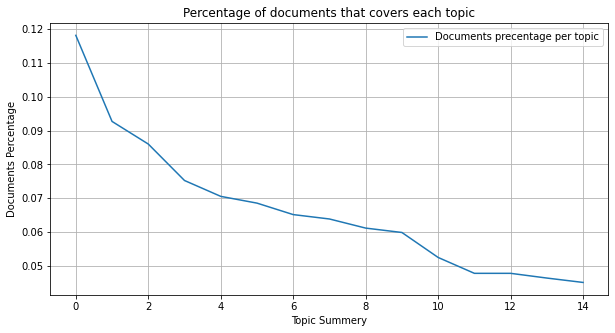

In [4]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(EuronewsTopicsSummeryDF.index.values, EuronewsTopicsSummeryDF.Perc_Documents.values,label='Documents precentage per topic')
ax.set(xlabel='Topic Summery', ylabel='Documents Percentage',title='Percentage of documents that covers each topic')
ax.grid()
ax.legend()

fig.savefig("test.png")
plt.show()

#### Display most trended topic keywords and Topic Summery

In [5]:
filename="./LDA_Euronews_colab.xlsx"
fullFile="./Euronews_full.xlsx"
EuronewsTopicsDF = pd.read_excel(filename, index_col=None, header=0)
EuronewsFull=pd.read_excel(fullFile, index_col=None, header=0)
df=EuronewsTopicsDF.join(EuronewsFull.published_date)
df.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,published_date
0,0,13,0.4267,"country, travel, quarantine, border, china, pa...",additional passengers cruise ship japan...,2020-02-05
1,1,13,0.2430,"country, travel, quarantine, border, china, pa...",new name still treated public enemy ...,2020-02-10
2,2,13,0.2080,"country, travel, quarantine, border, china, pa...",health authorities hong kong quarantined roug...,2020-02-12
3,3,6,0.2524,"case, country, death, italy, number, report, s...",spread new continent friday health offi...,2020-02-12
4,4,13,0.3410,"country, travel, quarantine, border, china, pa...",effects caught outbreak signi...,2020-02-12


#### Counts under topic COVID-19 Statistics

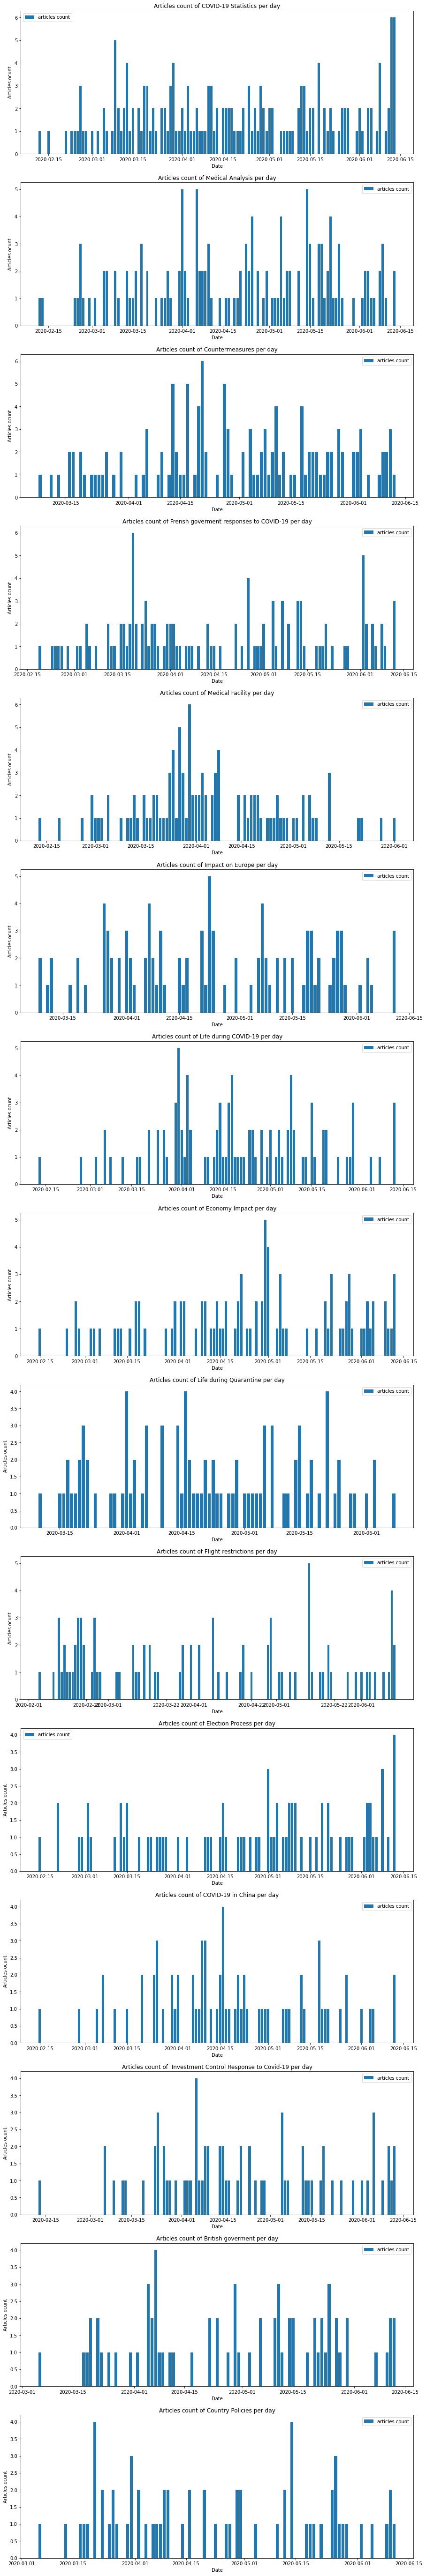

In [12]:
fig, axs = plt.subplots(EuronewsTopicsSummeryDF.shape[0],figsize=(15,100))
for index, row in EuronewsTopicsSummeryDF.iterrows():
    dataFrame=df[df.Keywords == row['Topic_Keywords']]
    dataFrame = dataFrame.groupby(dataFrame['published_date'].dt.date).size().reset_index(name='Count')
    axs[index].bar(dataFrame.published_date.values, dataFrame.Count.values,label='articles count')
    axs[index].set(xlabel='Date', ylabel='Articles ocunt',title='Articles count of '+row['Topic_Summary']+' per day')
    axs[index].legend()
plt.show()

In [11]:
def average(lst): 
    return sum(lst) / len(lst) 

def find_polarity(text_data):
    sentiment = TextBlob(text_data)
    return sentiment.polarity

def find_subjectivity(text_data):
    sentiment = TextBlob(text_data)
    return sentiment.subjectivity


polarity_list=[]
subjectivity_list=[]
topics=[]

for index, row in EuronewsTopicsSummeryDF.iterrows():
    dataFrame=df[df.Keywords == row['Topic_Keywords']]
    polarity = dataFrame['Text'].apply(lambda x:find_polarity(x))
    subjectivity =dataFrame['Text'].apply(lambda x:find_subjectivity(x))
    polarity_list.append(average(polarity))
    subjectivity_list.append(average(subjectivity))
    topics.append(row['Topic_Summary'])

textBolbResultDF = pd.DataFrame(list(zip(topics,polarity_list, subjectivity_list)), columns =['Topic_Summary', 'Polarity', 'Subjectivity']) 

textBolbResultDF

,Topic_Summary,Polarity,Subjectivity
0,COVID-19 Statistics,0.057908,0.405980
1,Medical Analysis,0.082184,0.434637
2,Countermeasures,0.064937,0.389599
3,Frensh goverment responses to COVID-19,0.070406,0.381428
4,Medical Facility,0.052819,0.394695
5,Impact on Europe,0.069804,0.344832
6,Life during COVID-19,0.118907,0.431910
7,Economy Impact,0.048102,0.371244
8,Life during Quarantine,0.069700,0.403964
9,Flight restrictions,0.057790,0.381318
